In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [3]:
df = pd.read_csv("virat.csv")

In [4]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [10]:
## Your code here
df.Runs.unique()
df["score"]=df.Runs.apply(lambda x: int(x.replace('*','')))
df.describe()

#Suggested Answer
df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))
df['Runs'].describe(percentiles = [0.25,0.5,1]) 

,BF,4s,6s,Pos,Inns,score
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,50.871212,4.371212,0.545455,3.303030,1.575758,46.848485
std,38.729716,4.404032,1.086795,0.873174,0.496110,41.994635
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,17.750000,1.000000,0.000000,3.000000,1.000000,10.000000
50%,42.500000,3.000000,0.000000,3.000000,2.000000,32.500000
75%,82.250000,7.000000,1.000000,4.000000,2.000000,80.250000
max,140.000000,18.000000,7.000000,7.000000,2.000000,154.000000


#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


{'whiskers': [<matplotlib.lines.Line2D at 0x7fca2d250f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca2d25f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca2d250be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca2d25fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca2d1ec0a0>],
 'means': []}

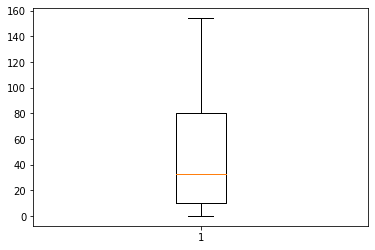

In [11]:
#Your code here'

plt.boxplot(df.score)

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [18]:
## Your code here
df.info()
df["Start Date"]= df["Start Date"].astype('datetime64')
df["year"]=pd.DatetimeIndex(df["Start Date"]).year
print(df.year.value_counts())
pd.pivot_table(df, values="score", columns=['year'], aggfunc=np.mean)

#suggested Answer
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))
df['Start Date'].value_counts()
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        132 non-null    object        
 1   Mins        132 non-null    object        
 2   BF          132 non-null    int64         
 3   4s          132 non-null    int64         
 4   6s          132 non-null    int64         
 5   SR          132 non-null    object        
 6   Pos         132 non-null    int64         
 7   Dismissal   132 non-null    object        
 8   Inns        132 non-null    int64         
 9   Opposition  132 non-null    object        
 10  Ground      132 non-null    object        
 11  Start Date  132 non-null    datetime64[ns]
 12  score       132 non-null    int64         
 13  year        132 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 14.6+ KB
2011    31
2013    23
2014    17
2010    16
2012    11
20

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
score,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


(array([33., 14., 10., 11.,  6.,  5., 10.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  0.        ,  13.46666667,  26.93333333,  40.4       ,
         53.86666667,  67.33333333,  80.8       ,  94.26666667,
        107.73333333, 121.2       , 134.66666667, 148.13333333,
        161.6       , 175.06666667, 188.53333333, 202.        ]),
 <BarContainer object of 15 artists>)

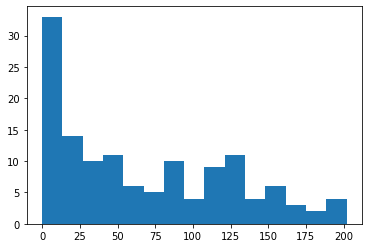

In [23]:
#Your code here
df["Mins"]=df["Mins"].apply(lambda x: int(str(x).replace('-','0')))
plt.hist(df.Mins, bins=15)